In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from scipy.signal import convolve2d
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


C:\Users\roger\AppData\Local\Temp\ipykernel_16784\4220733811.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Manual 2D convolution in numpy /scipy


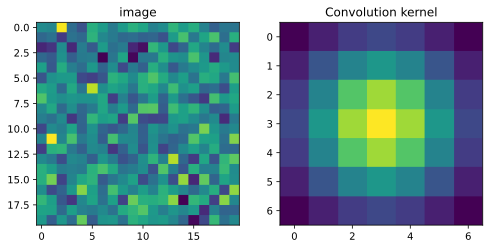

In [5]:
imgN=20
image=np.random.randn(imgN,imgN)

##convolution kernel
kernelN=7
Y,X=np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel=np.exp(-(X**2+Y**2)/7)

## Let's see what they look like
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()


In [7]:
import numpy as np

convoutput = np.zeros((imgN, imgN))
halfkr = kernel.shape[0] // 2  # assuming square kernel

for rowi in range(halfkr, imgN - halfkr):
    for coli in range(halfkr, imgN - halfkr):

        # Correct slicing: center the kernel around (rowi, coli)
        pieceOfImg = image[rowi - halfkr:rowi + halfkr + 1, coli - halfkr:coli + halfkr + 1]

        # Convolution: element-wise multiply then sum
        dotprod = np.sum(pieceOfImg * kernel[::-1, ::-1])  # flip the kernel

        convoutput[rowi, coli] = dotprod


In [8]:
convoutput2=convolve2d(image,kernel,mode='valid')

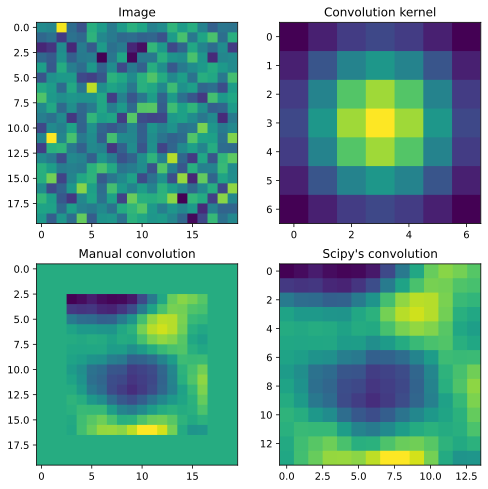

In [11]:
fig,ax=plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.show()

Original shape: (360, 360, 3)


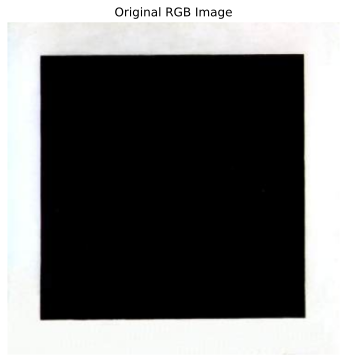

Grayscale shape: (360, 360)


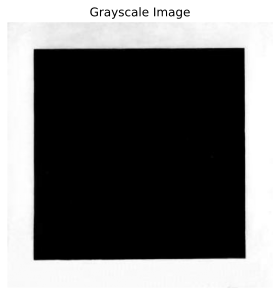

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import imageio.v3 as iio  # newer imageio version

# Read the image from a URL
url = 'https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg'
response = requests.get(url)
bathtub = iio.imread(BytesIO(response.content))

# Print shape (should be H x W x 3)
print("Original shape:", bathtub.shape)

# Show original image
fig = plt.figure(figsize=(10, 6))
plt.imshow(bathtub)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

# Convert to grayscale by averaging color channels
bathtub = np.mean(bathtub, axis=2)

# Normalize (values between 0 and 1)
bathtub = bathtub / np.max(bathtub)

# Print new shape
print("Grayscale shape:", bathtub.shape)

# Show grayscale image
plt.imshow(bathtub, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [14]:
VK=np.array([[1,0,-1],
            [1,0,-1],
            [1,0,-1] 
             ])


HK=np.array([[1,1,1],
            [0,0,0],
            [-1,-1,-1] 
             ])

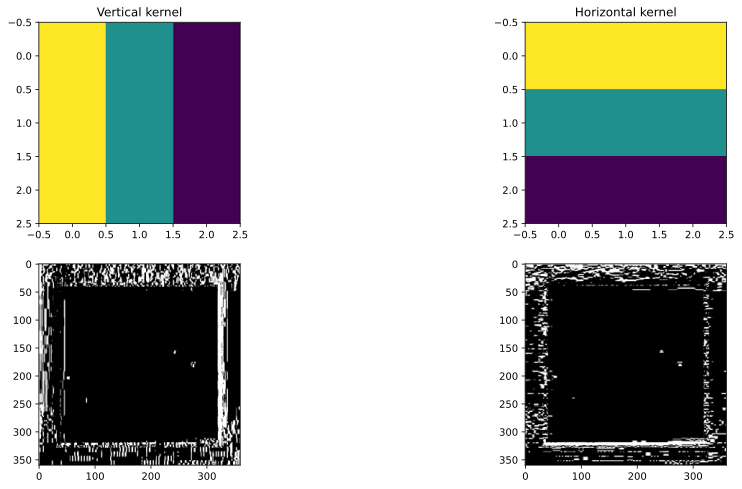

In [16]:
fig,ax=plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

convers=convolve2d(bathtub,VK,mode='same')
ax[1,0].imshow(convers,cmap='gray',vmin=0,vmax=.01)

convers=convolve2d(bathtub,HK,mode='same')
ax[1,1].imshow(convers,cmap='gray',vmin=0,vmax=.01)

plt.show()

### Now Pytorch

In [17]:
VK_T=torch.tensor(VK).view(1,1,3,3).double()
HK_T=torch.tensor(HK).view(1,1,3,3).double()
bathtub_T=torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])


print(VK_T.shape)
print(bathtub_T.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 360, 360])


In [18]:
C=F.conv2d(bathtub_T,VK_T)
print(C.shape)

torch.Size([1, 1, 358, 358])


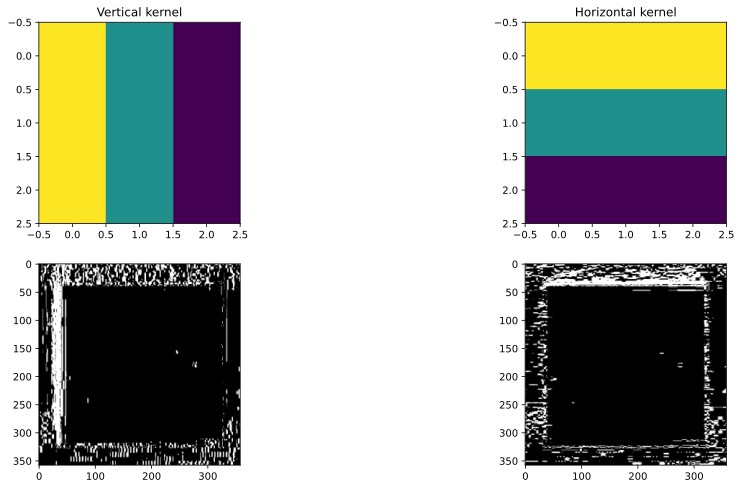

In [20]:
fig,ax=plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')

convers=F.conv2d(bathtub_T,VK_T)
img=torch.squeeze(convers.detach())
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convers=F.conv2d(bathtub_T,HK_T)
img=torch.squeeze(convers.detach())
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()